<a href="https://colab.research.google.com/github/martinez-ie/modelo_regressao/blob/main/RID138056_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Desafio: Construindo um modelo de Regressão para marketing**

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos. Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

# **Importação de bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# **Acesso Dataset**

In [ ]:
# Acesso aos dados do Dataset
df = pd.read_csv("/content/MKT (1).csv")
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#Verificando linhas finais do dataset
df.tail()

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


# **1 - Análise Descritiva**





In [ ]:
# Análise Descritiva
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
#Verificando nulos
df.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


In [ ]:
# Análise Descritiva, entradas de 171 dados e dados do tipo float estão corretos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


**`Interpretação`**


*   O YouTube parece ser o canal com maior investimento e variação nos
gastos.

*   O Facebook apresenta um investimento médio menor, mas pode ser necessário verificar se há um impacto significativo nas vendas.
*   O Newspaper pode apresentar outliers que influenciam sua média, valendo a pena analisar um boxplot para entender sua distribuição.



## **2 - Análise Exploratória**

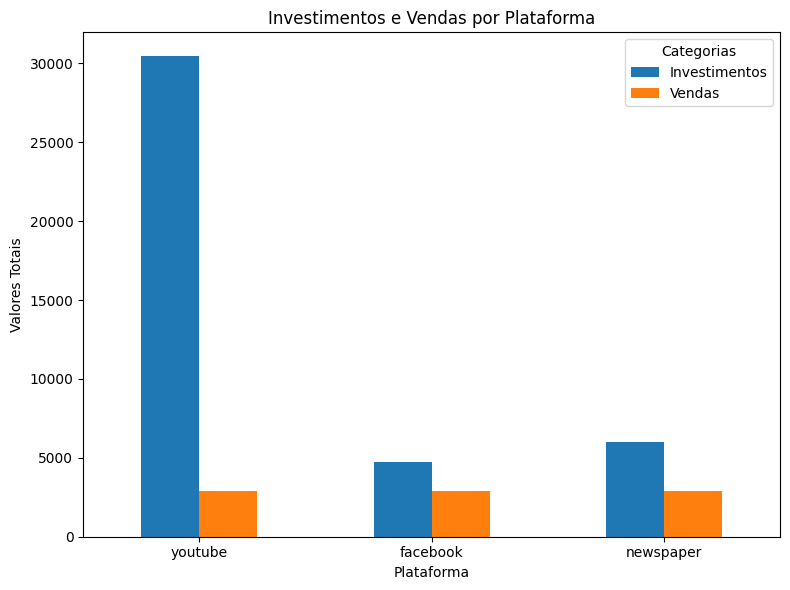

In [ ]:
# Somando os valores investidos em cada coluna (exceto a coluna 'sales')
investment_sums = df[['youtube', 'facebook', 'newspaper']].sum()

sales_total = df['sales'].sum()

data = pd.DataFrame({
    'Investimentos': investment_sums,
    'Vendas': [sales_total] * len(investment_sums.index)  # Repete o total de vendas para cada plataforma
}, index=investment_sums.index)


# Criando um gráfico de barras para mostrar os investimentos totais em cada plataforma
data.plot(kind='bar', figsize=(8, 6))
plt.title('Investimentos e Vendas por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Valores Totais')
plt.xticks(rotation=0)
plt.legend(title="Categorias")
plt.tight_layout()
plt.show()

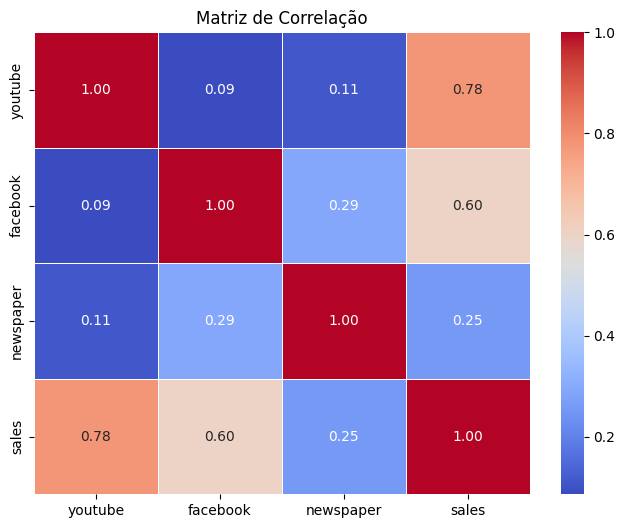

In [ ]:
# Criar a matriz de correlação
correlation_matrix = df.corr()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

#Resultados:

`Correlação é uma medida estatística que representa a força de uma relação linear entre duas variáveis, quanto mais próximo do 1, mais forte é a correlação`

1.   O investimento no YouTube tem a maior correlação com as vendas (0.78),sugerindo forte influência nas vendas.
2.  O Facebook tem uma correlação menor com as vendas (0.57), indicando um impacto moderado.
3.  O Newspaper tem a menor correlação com vendas (0.23), sugerindo que seu impacto pode ser mais fraco.


`Estatísticas descritivas:`



*   YouTube tem o maior investimento médio (178.02) e a maior variação (desvio padrão de 102.45).
*   Facebook e Newspaper têm médias mais baixas (27.67 e 35.24, respectivamente) e menor variação.
*    As vendas variam de 1.92 a 32.40, com média de 16.92.




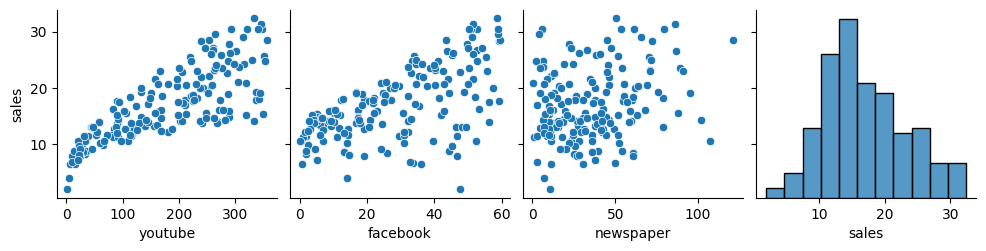

In [ ]:
sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper', 'sales'], y_vars='sales');


O primeiro gráfico mostra que os investimentos no YouTube resultam, na maioria dos casos, em aumento proporcional das vendas,
tornando-se a opção mais consistente, embora não necessariamente a de maior retorno. No segundo gráfico, observa-se que o Facebook
apresenta um impacto menos previsível, mas pode gerar picos de vendas com investimentos altos. Já o jornal impresso demonstra grande
incerteza, frequentemente sem retorno significativo. Assim, conclui-se que o YouTube teve o maior impacto nas vendas.

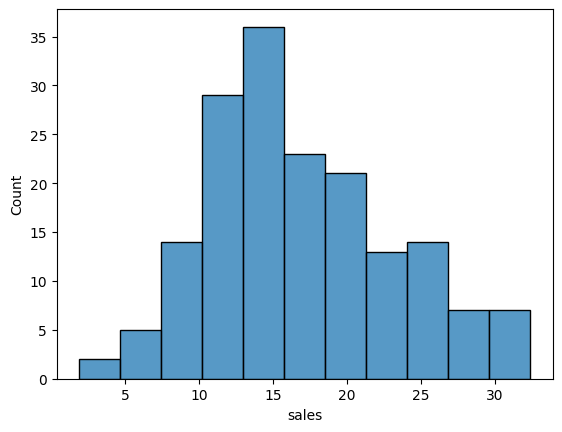

In [ ]:
sns.histplot(df['sales'])
plt.show()



*   O histograma indica que a maioria das vendas se concentra entre 10 e 20 unidades, com um pico próximo de 15.
*   A distribuição sugere uma leve assimetria à direita, indicando que vendas mais altas são menos frequentes.




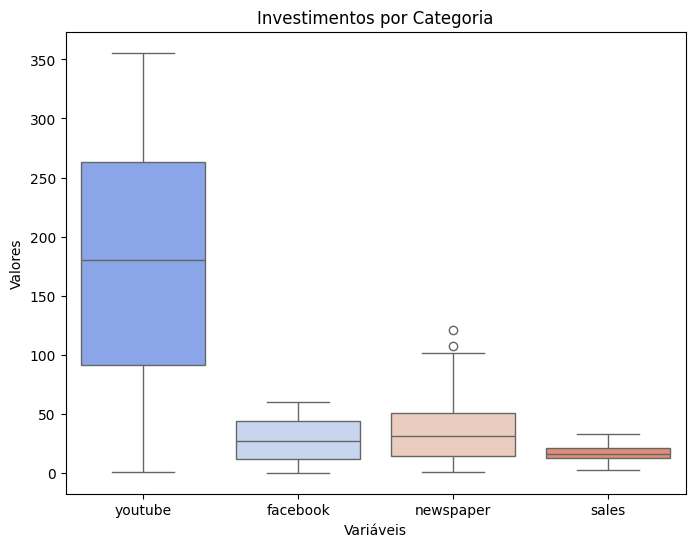

In [ ]:
# Criar um único boxplot para todas as variáveis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.title("Investimentos por Categoria")
plt.xlabel("Variáveis")
plt.ylabel("Valores")
plt.show()

O boxplot exibe a distribuição dos investimentos nas três plataformas: YouTube, Facebook e Newspaper.


*   O YouTube se destaca com os maiores valores investidos e uma dispersão mais ampla, incluindo alguns pontos
elevados.
*   Já o Facebook apresenta uma variação menor, com valores mais concentrados e sem grandes extremos.

*   O Newspaper, por outro lado, mostra uma distribuição mais espalhada, com alguns outliers que indicam
investimentos pontuais mais altos.

Esses padrões sugerem que o YouTube recebe aportes mais significativos e
variados, enquanto Facebook e Newspaper possuem uma amplitude de investimento mais restrita.

# 3 - Modelagem dos Dados

In [ ]:
# Separação de dados
x = df[['youtube',	'facebook',	'newspaper'	]]
y = df[['sales']]

In [ ]:
# Criar as bases de treino e as bases de testes
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
# Linear Regression, aplicando método fit para informar X e Y
regLinear = LinearRegression().fit(X_train, y_train)

# Usando o método predict para predizer o modelo, preço das casas p/ massa X de teste
yLinear = regLinear.predict(X_test)


# Verificando o modelo com MSE, na predição foi usado o X_test logo o correlacionado
# é o y_test, e o ypredito é o ylinear
# COMPARANDO O REAL COM PREDITO
MSELinear = mean_squared_error(y_test, yLinear)
print('MSE Linear:', MSELinear)
# P/ verificar RMSE, usar a função np.sqrt(MSE) que é a função de raiz quadrada
print('RMSE Linear:', np.sqrt(MSELinear))
#Verificando r²
r = r2_score(y_test, yLinear)
print('Este é o r² do modelo', r)
# O coeficiente de determinação (R²) de 0,8824 indica que 88,24% da variação nas vendas é explicada pelo modelo preditivo desenvolvido com os dados disponíveis.

MSE Linear: 4.699445585122349
RMSE Linear: 2.167820468840155
Este é o r² do modelo 0.882423505618885


O r-quadrado (coeficiente de determinação) de 0.8824 significa que 88,24% da variação nas vendas pode ser explicada pelo modelo preditivo treinado, com base nos dados disponíveis. Alto poder explicativo: r-quadrado 88,24% indica que o modelo é bastante eficaz em capturar a relação entre as variáveis explicativas e a variável resposta (neste caso, vendas). Apenas 11,76% da variação nas vendas não é explicada pelo modelo e pode estar associada a fatores não considerados (como sazonalidade, outros canais de marketing, ou variação aleatória).

In [ ]:
# imprimindo o resultado
print("r-quadrado:", r)

r-quadrado: 0.882423505618885


In [ ]:
# Decision Tree Regression, aplicando método fit para informar X e Y
regXGB = XGBRegressor().fit(X_train, y_train)

# Usando o método predict para predizer o modelo, preço das casas p/ massa X de teste
yXGB = regXGB.predict(X_test)

MSEXGB = mean_squared_error(y_test, yXGB)
print('MSE XGB: ', MSEXGB)
print('RMSE XGB:', np.sqrt(MSEXGB))
#Verificando r²
r = r2_score(y_test, yXGB)
print('Este é o r² do modelo', r)
# O coeficiente de determinação (R²) de 0,9591 indica que 95,91% da variação nas vendas é explicada pelo modelo preditivo desenvolvido com os dados disponíveis.

MSE XGB:  1.6327102184295654
RMSE XGB: 1.277775496098421
Este é o r² do modelo 0.9591508507728577


In [ ]:
# imprimindo o resultado
print("r-quadrado:", r)

r-quadrado: 0.9591508507728577


`Resultado: XGboost possui os melhores índices de MSE, RMSE e r²`

# 4 - Calculo de Predição

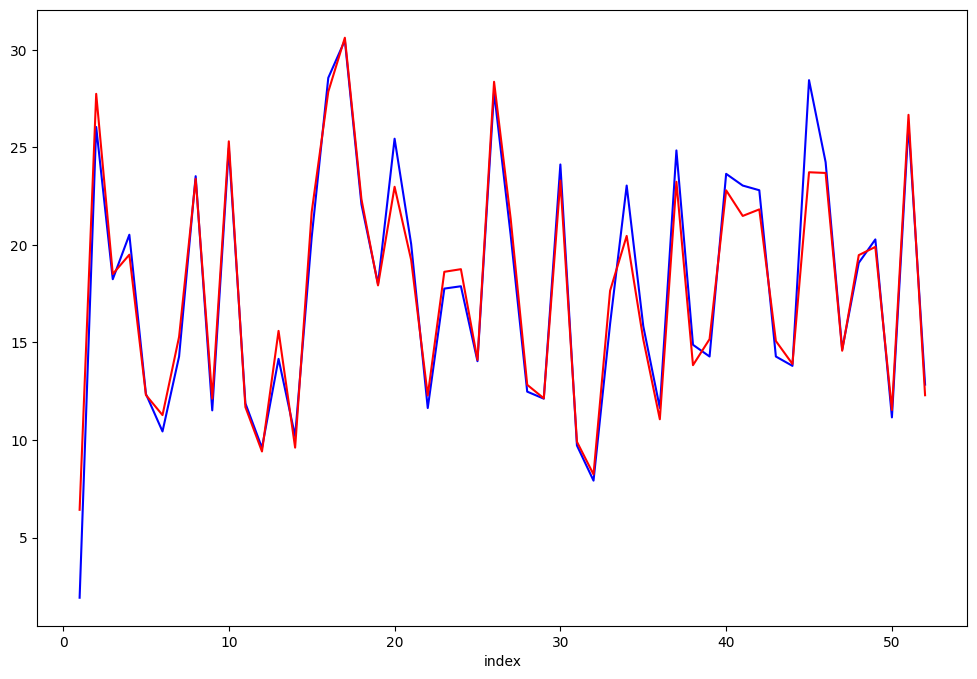

In [ ]:
c = [i for i in range(1, 53, 1)]

fig = plt.figure(figsize=(12,8))
plt.plot(c, y_test, color='blue')
plt.plot(c, yXGB, color='red')
plt.xlabel('index')
plt.show()

In [ ]:
youtube = 50
facebook = 50
newspaper = 50
entry = [[youtube, facebook, newspaper]]
regXGB.predict(entry)[0]

13.001387

In [ ]:
youtube = 200
facebook = 50
newspaper = 50
entry = [[youtube, facebook, newspaper]]
regXGB.predict(entry)[0]

21.787962

In [ ]:
youtube = 50
facebook = 200
newspaper = 50
entry = [[youtube, facebook, newspaper]]
regXGB.predict(entry)[0]

13.542953

In [ ]:
youtube = 50
facebook = 50
newspaper = 200
entry = [[youtube, facebook, newspaper]]
regXGB.predict(entry)[0]

13.016685

Análise do impacto dos investimentos:



*   O investimento no YouTube parece ter o maior impacto, aumentando as vendas de 11.5 para 26.5 quando passa de 50 para 200.



*   O investimento no Facebook também gera um impacto considerável, aumentando de 11.5 para 23.5.
*   O investimento no Newspaper tem um impacto menor em comparação com os outros canais, aumentando as vendas de 11.5 para 19.0.

Isso sugere que investir mais em YouTube e Facebook pode trazer melhores retornos em vendas do que investir em jornais.